# ELM463
## LAB02
### Written by Alperen Arslan

In [98]:
import numpy as np
import matplotlib.pyplot as plt

##### PGM Read

In [99]:
# Description:
#
# Read given matrix to PGM file
#
# @param[1]: Filename. It is name of PGM file that wants to read.
#
# @return[1]: Image Data. The values of image pixels.
# @return[2]: Magic Number. Magic number is identifies the file type. PGM file type is P5. Default define is P5.
# @return[3]: Width. Width value of the image.
# @return[4]: Height. Height value of the image.
# @return[5]: Resolution. The value of maximum pixel value.
#
def pgmread(filename):
    with open(filename, 'rb') as f:
        # Read the header section
        header_lines = []
        for line in f:
            line = line.rstrip().decode('utf-8')
            if line and not line.startswith('#'):
                header_lines.append(line)
                if len(header_lines) == 3:
                    break

        # Parse the header information
        magicNum = header_lines[0]
        width, height = map(int, header_lines[1].split())
        resolution = int(header_lines[2])

        # Read the remaining data
        imageData = f.read()

    return (imageData, magicNum, width, height, resolution)

### Using Second Derivative for Image Sharpening (The Laplacian) (Figure 3.38)

In [100]:
# Description:
#
# Smooth the given image with average filter
#
# @param[1]: Image. Image that want to smooth of.
# @param[2]: Filter. Given average filter that created from averageFilter function.
#
# @return[]: Smoothed image.
#
def imageSmoother(image, filter):
    # Take height and width values from given image and create empty smoothed image matrix
    height, width = image.shape
    imageSmoothed = np.zeros((height, width))

    # Filter length at one dimension
    filterSize = filter.shape[0]

    # Create new padded image matrix
    padNumber = filterSize // 2
    paddedImage = np.pad(image, padNumber, mode='constant')

    # Apply filter to original image's all pixels
    for i in range(height):
        for j in range(width):
            # Calculate new pixel value 
            imageSmoothed[i, j] = np.sum(paddedImage[i:i+filterSize, j:j+filterSize] * filter)

    # Normalize and round all new pixel values
    if np.sum(filter) != 0:
        imageSmoothed = np.round(imageSmoothed / np.sum(filter)).astype(int)

    # Return smoothed image
    return imageSmoothed

Magic Num: P5
Width: 466
Height: 540
Resolution: 255

Image Matrix: 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



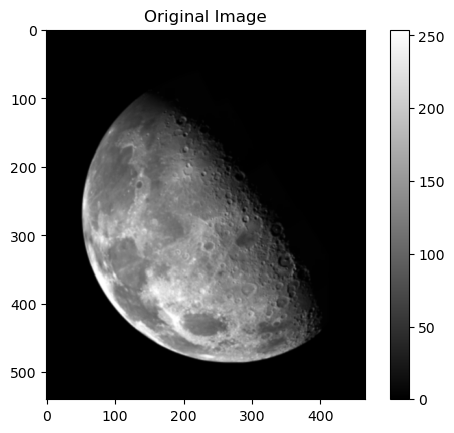

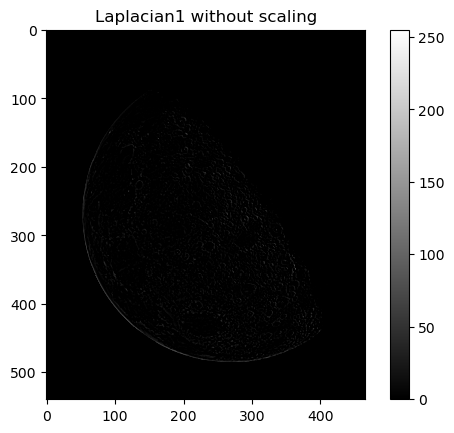

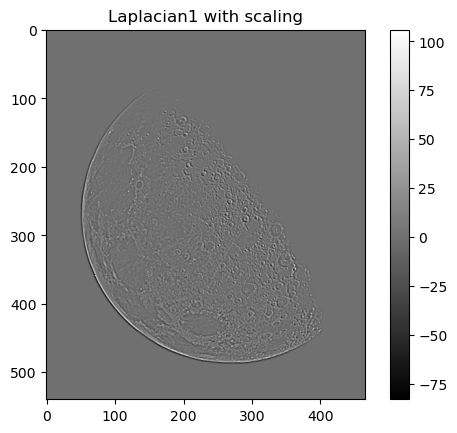

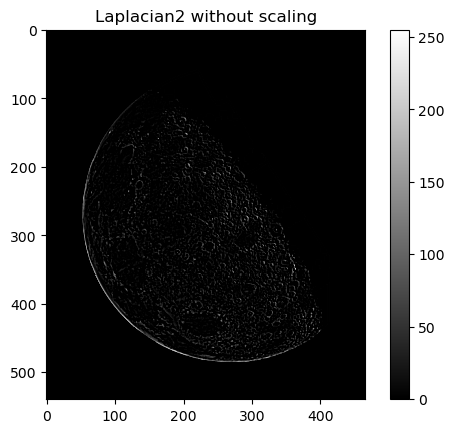

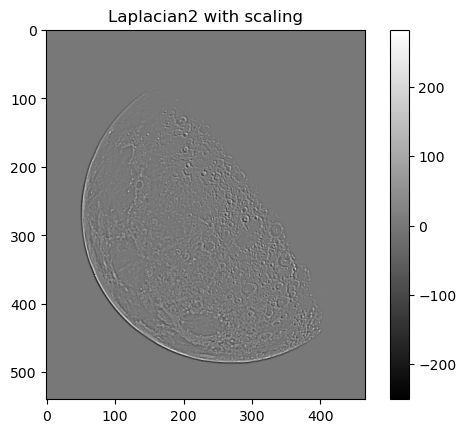

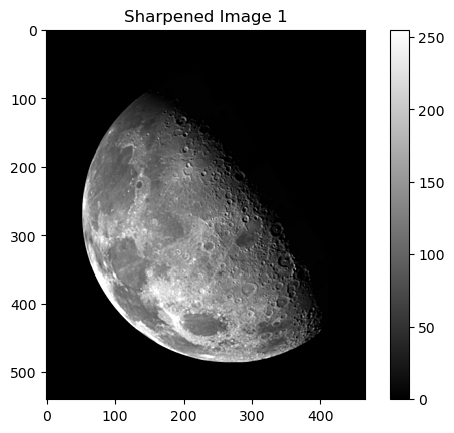

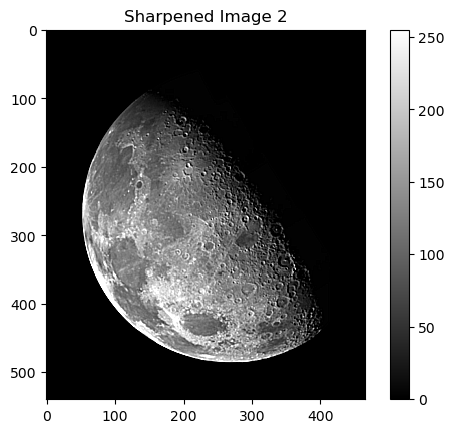

In [101]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('img/moon.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray")
plt.colorbar()

laplacians = [
    np.array([[ 0, -1,  0], [-1, 4, -1], [ 0, -1,  0]]),
    np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
]

# Smooth the image for each laplacian
smoothedImages = [imageSmoother(image, laplacian) for laplacian in laplacians]

# Show images
titles = ['Laplacian1 with scaling', 'Laplacian1 without scaling',
          'Laplacian2 with scaling', 'Laplacian2 without scaling']
cmaps = ['gray', 'gray', 'gray', 'gray']
vmins = [None, 0, None, 0]
vmaxs = [None, 255, None, 255]

for i, smoothedImage in enumerate(smoothedImages):
    plt.figure()
    plt.title(titles[i*2+1])
    plt.imshow(smoothedImage, cmap=cmaps[i*2+1], vmin=vmins[i*2+1], vmax=vmaxs[i*2+1])
    plt.colorbar()
    
    plt.figure()
    plt.title(titles[i*2])
    plt.imshow(smoothedImage, cmap=cmaps[i*2], vmin=vmins[i*2], vmax=vmaxs[i*2])
    plt.colorbar()
    
# Calculate sharpened images
sharpenedImages = [image + smoothedImage for smoothedImage in smoothedImages]
    
# Show images
titles = ['Sharpened Image 1', 'Sharpened Image 2']

for i, sharpenedImage in enumerate(sharpenedImages):
    plt.figure()
    plt.title(titles[i])
    plt.imshow(sharpenedImage, cmap='gray', vmin=0, vmax=255)
    plt.colorbar()

### Unsharp Masking and Highboost Filtering (Figure 3.40)

In [102]:
def gaussianFilter(size, sigma):
    # Ensure the size is odd
    if size % 2 == 0:
        return 'Size must be odd'

    # Create an empty filter
    indices = np.arange(-(size // 2), size // 2 + 1)
    
    # Create a grid of distances from the center
    X, Y = np.meshgrid(indices, indices)
    
    # Calculate the Gaussian weights
    weights = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    
    # Normalize the weights
    # weights /= np.sum(weights) # Normalized at the imageSmoother function
    
    return weights

Magic Num: P5
Width: 320
Height: 138
Resolution: 255

Image Matrix: 

[[51 51 51 ... 51 51 51]
 [51 51 51 ... 51 51 51]
 [51 51 51 ... 51 51 51]
 ...
 [51 51 51 ... 51 51 51]
 [51 51 51 ... 51 51 51]
 [51 51 51 ... 51 51 51]]



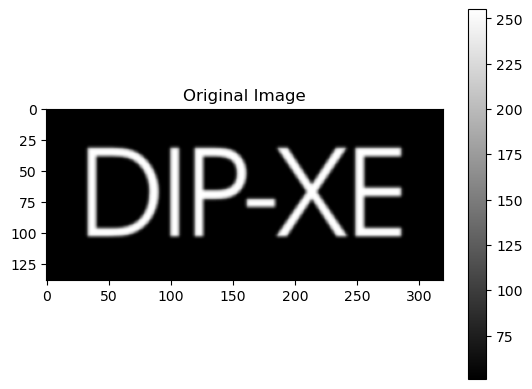

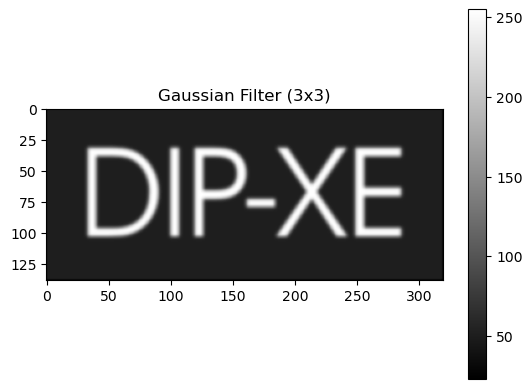

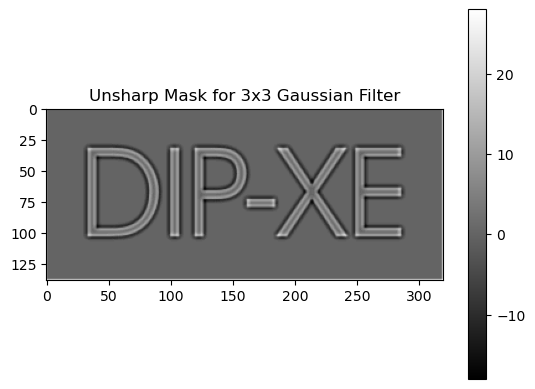

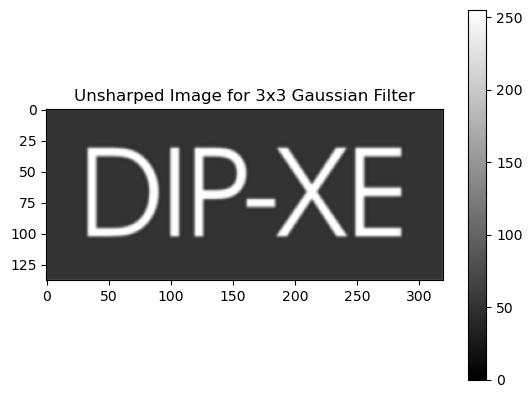

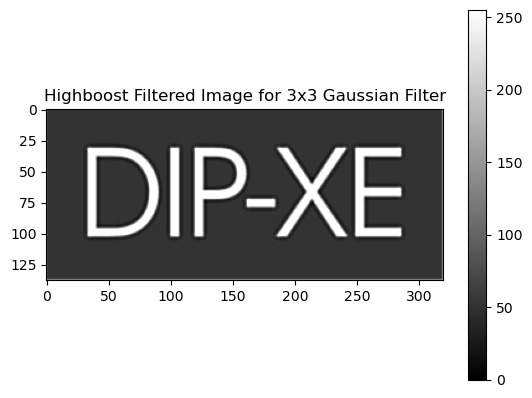

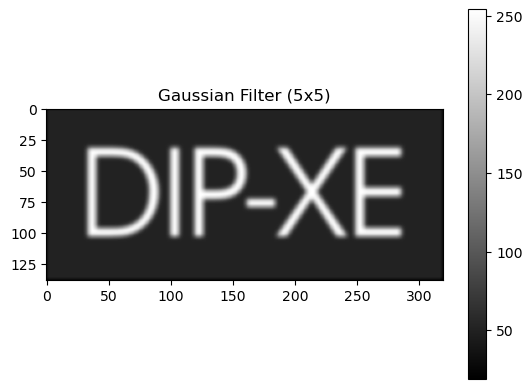

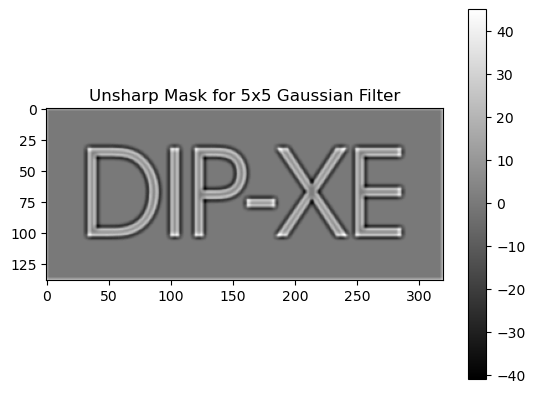

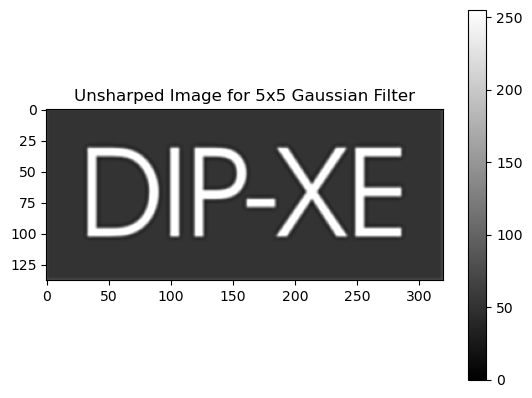

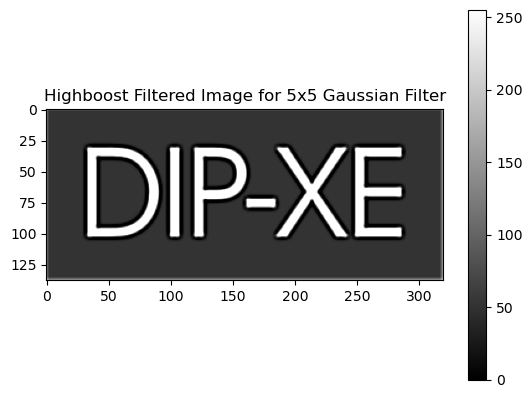

In [103]:
# Add image file
[image, magicNum, width, height, resolution] = pgmread('img/dipxe.pgm')

# Image infos
print('Magic Num:', magicNum)
print('Width:', width)
print('Height:', height)
print('Resolution:', resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray")
plt.colorbar()

# Define Gaussian filters
gaussians = [gaussianFilter(3, 3), gaussianFilter(5, 3)]

# Smooth the image for each Gaussian
smoothedImages = [imageSmoother(image, gaussian) for gaussian in gaussians]

# Show images
titles_smoothed  = ['Gaussian Filter (3x3)', 'Gaussian Filter (5x5)']
titles_unsharp   = ['Unsharp Mask for 3x3 Gaussian Filter', 'Unsharp Mask for 5x5 Gaussian Filter']
titles_unsharped = ['Unsharped Image for 3x3 Gaussian Filter', 'Unsharped Image for 5x5 Gaussian Filter']
titles_highboost = ['Highboost Filtered Image for 3x3 Gaussian Filter', 'Highboost Filtered Image for 5x5 Gaussian Filter']

for i, (smoothedImage, gaussian) in enumerate(zip(smoothedImages, gaussians)):
    # Show smoothed image
    plt.figure()
    plt.title(titles_smoothed[i])
    plt.imshow(smoothedImage, cmap='gray')
    plt.colorbar()

    # Compute unsharp mask
    unsharpMask = image - smoothedImage

    # Show unsharp mask
    plt.figure()
    plt.title(titles_unsharp[i])
    plt.imshow(unsharpMask, cmap='gray')
    plt.colorbar()

    # Compute unsharped image
    k = 1
    unsharpedImage = image + k * unsharpMask

    # Show unsharped image
    plt.figure()
    plt.title(titles_unsharped[i])
    plt.imshow(unsharpedImage, cmap='gray', vmin=0, vmax=255)
    plt.colorbar()

    # Compute highboost filtered image
    k = 4.5
    highboostedImage = image + k * unsharpMask

    # Show highboost filtered image
    plt.figure()
    plt.title(titles_highboost[i])
    plt.imshow(highboostedImage, cmap='gray', vmin=0, vmax=255)
    plt.colorbar()

### Histogram Processing (Figure 3.20)

##### Dark Apricot Image

Magic Num: P5
Width: 500
Height: 500
Resolution: 255

Image Matrix of Dark Apricot Image: 

[[13 13 13 ... 36 36 33]
 [13 13 13 ... 35 35 31]
 [13 13 13 ... 29 29 26]
 ...
 [19 13 13 ... 58 56 56]
 [20 15 13 ... 56 56 53]
 [22 18 13 ... 55 55 49]]



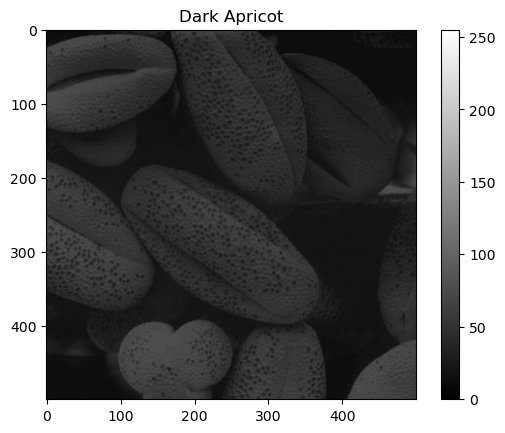

In [104]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('img/darkApricot.pgm')

# Image infos
print('Magic Num:', magicNum)
print('Width:', width)
print('Height:', height)
print('Resolution:', resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix of Dark Apricot Image: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('Dark Apricot')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

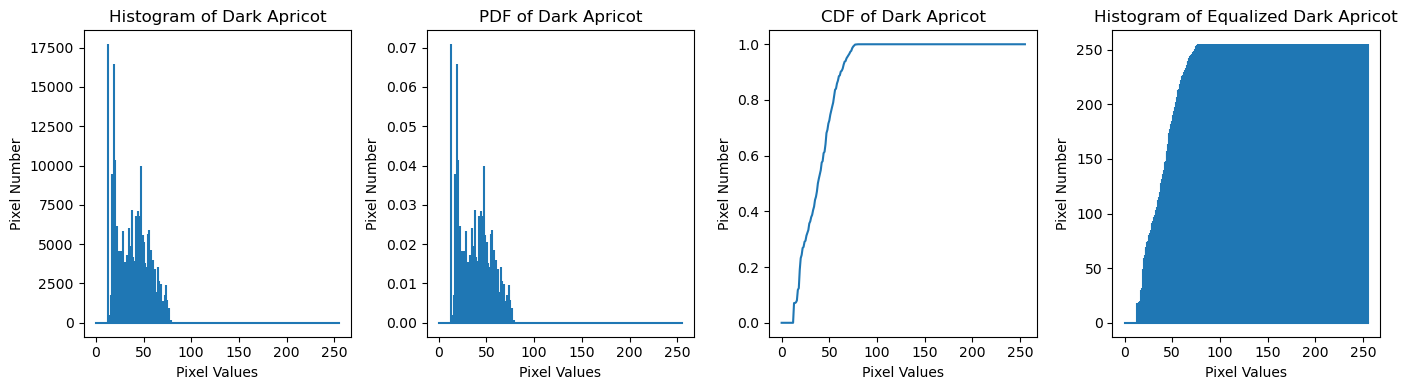

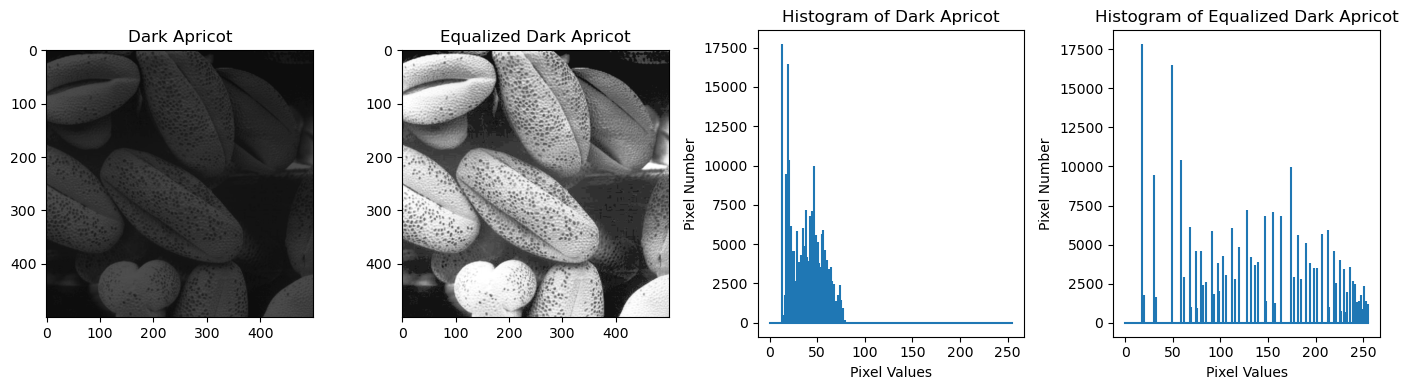

In [105]:
# Calculate histogram of the image
# The np.histogram function returns the histogram and edge values as tuples
# Our interest is only in the histogram vector
# The image.flatten() function converts the matrix from 2D to 1D
# Size of the image matrix is resolution +1
# It used resolution + 2, because of range function does not includes start and end values
histogramVector, _ = np.histogram(image.flatten(), bins=np.arange(resolution + 2))

# Calculate probability density function (PDF)
pdfVector = histogramVector / np.sum(histogramVector)

# Calculate cumulative distribution function (CDF)
cdfVector = np.cumsum(pdfVector)

# Scale the CDF vector
equalizedVector = np.round(cdfVector * 255)

# Create a 2x2 subplot grid
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

# Plot histogram of original image
axs[0].stem(histogramVector, linefmt='-', markerfmt='None', basefmt='')
axs[0].set_title('Histogram of Dark Apricot')
axs[0].set_xlabel('Pixel Values')
axs[0].set_ylabel('Pixel Number')

# Plot PDF of original image
axs[1].stem(pdfVector, linefmt='-', markerfmt='None', basefmt='')
axs[1].set_title('PDF of Dark Apricot')
axs[1].set_xlabel('Pixel Values')
axs[1].set_ylabel('Pixel Number')

# Plot CDF of original image
axs[2].plot(cdfVector)
axs[2].set_title('CDF of Dark Apricot')
axs[2].set_xlabel('Pixel Values')
axs[2].set_ylabel('Pixel Number')

# Plot histogram of equalized image
axs[3].stem(equalizedVector, linefmt='-', markerfmt='None', basefmt='')
axs[3].set_title('Histogram of Equalized Dark Apricot')
axs[3].set_xlabel('Pixel Values')
axs[3].set_ylabel('Pixel Number')

# Adjust spacing between subplots and show the plots
plt.tight_layout()
plt.show()

# Replace the old pixel values with the new ones
equalizedMatrix = equalizedVector[image]

# Calculate histogram of the new image
newHistogramVector, _ = np.histogram(equalizedMatrix.flatten(), bins=np.arange(resolution + 2))

# Create a 2x2 subplot grid
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

# Plot the dark apricot image
axs[0].imshow(image, cmap="gray", vmin=0, vmax=255)
axs[0].set_title('Dark Apricot')

# Plot the equalized dark apricot image
axs[1].imshow(equalizedMatrix, cmap="gray", vmin=0, vmax=255)
axs[1].set_title('Equalized Dark Apricot')

# Plot histogram of original image
axs[2].stem(histogramVector, linefmt='-', markerfmt='None', basefmt='')
axs[2].set_title('Histogram of Dark Apricot')
axs[2].set_xlabel('Pixel Values')
axs[2].set_ylabel('Pixel Number')

# Plot histogram of original image
axs[3].stem(newHistogramVector, linefmt='-', markerfmt='None', basefmt='')
axs[3].set_title('Histogram of Equalized Dark Apricot')
axs[3].set_xlabel('Pixel Values')
axs[3].set_ylabel('Pixel Number')

# Adjust spacing between subplots and show the plots
plt.tight_layout()
plt.show()

##### Light Apricot Image

Magic Num: P5
Width: 500
Height: 500
Resolution: 255

Image Matrix of Light Apricot Image: 

[[132 132 132 ... 191 191 184]
 [132 132 132 ... 190 190 179]
 [132 132 132 ... 175 175 166]
 ...
 [149 132 132 ... 248 242 242]
 [151 138 132 ... 242 242 235]
 [156 145 132 ... 240 240 224]]



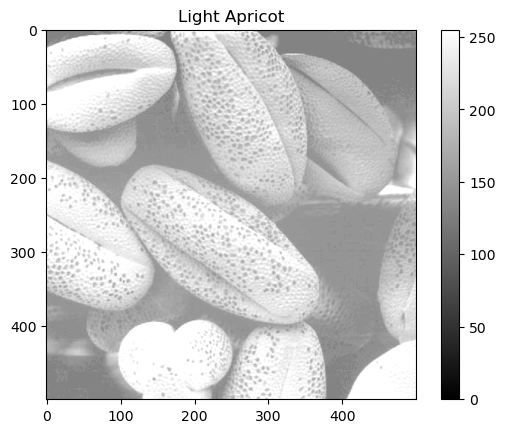

In [106]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('img/lightApricot.pgm')

# Image infos
print('Magic Num:', magicNum)
print('Width:', width)
print('Height:', height)
print('Resolution:', resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix of Light Apricot Image: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('Light Apricot')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

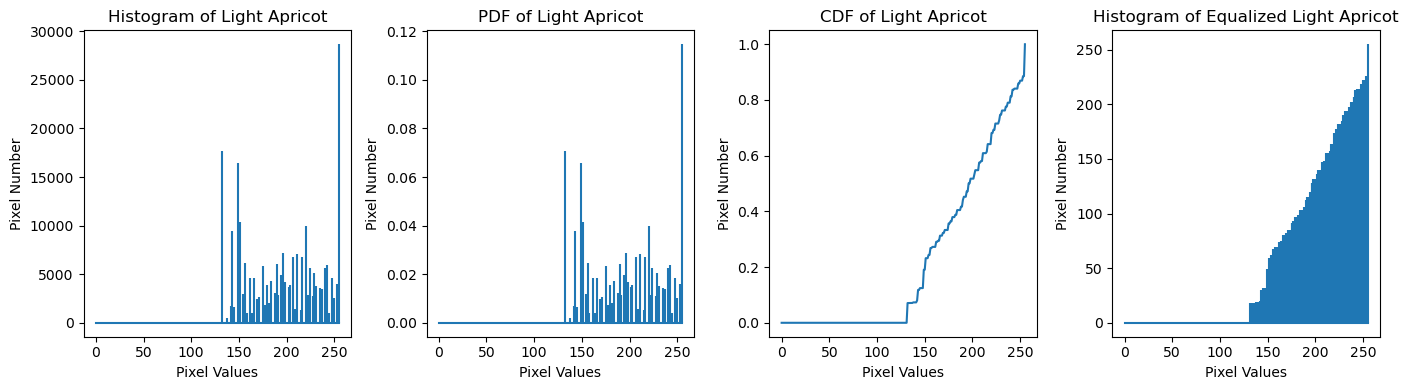

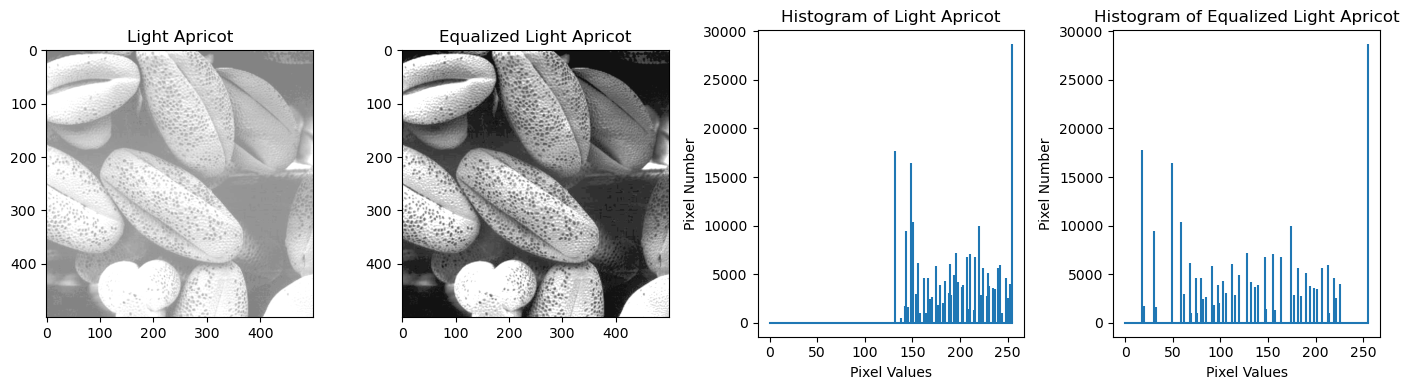

In [107]:
# Calculate histogram of the image
# The np.histogram function returns the histogram and edge values as tuples
# Our interest is only in the histogram vector
# The image.flatten() function converts the matrix from 2D to 1D
# Size of the image matrix is resolution +1
# It used resolution + 2, because of range function does not includes start and end values
histogramVector, _ = np.histogram(image.flatten(), bins=np.arange(resolution + 2))

# Calculate probability density function (PDF)
pdfVector = histogramVector / np.sum(histogramVector)

# Calculate cumulative distribution function (CDF)
cdfVector = np.cumsum(pdfVector)

# Scale the CDF vector
equalizedVector = np.round(cdfVector * 255)

# Create a 2x2 subplot grid
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

# Plot histogram of original image
axs[0].stem(histogramVector, linefmt='-', markerfmt='None', basefmt='')
axs[0].set_title('Histogram of Light Apricot')
axs[0].set_xlabel('Pixel Values')
axs[0].set_ylabel('Pixel Number')

# Plot PDF of original image
axs[1].stem(pdfVector, linefmt='-', markerfmt='None', basefmt='')
axs[1].set_title('PDF of Light Apricot')
axs[1].set_xlabel('Pixel Values')
axs[1].set_ylabel('Pixel Number')

# Plot CDF of original image
axs[2].plot(cdfVector)
axs[2].set_title('CDF of Light Apricot')
axs[2].set_xlabel('Pixel Values')
axs[2].set_ylabel('Pixel Number')

# Plot histogram of equalized image
axs[3].stem(equalizedVector, linefmt='-', markerfmt='None', basefmt='')
axs[3].set_title('Histogram of Equalized Light Apricot')
axs[3].set_xlabel('Pixel Values')
axs[3].set_ylabel('Pixel Number')

# Adjust spacing between subplots and show the plots
plt.tight_layout()
plt.show()

# Replace the old pixel values with the new ones
equalizedMatrix = equalizedVector[image]

# Calculate histogram of the new image
newHistogramVector, _ = np.histogram(equalizedMatrix.flatten(), bins=np.arange(resolution + 2))

# Create a 2x2 subplot grid
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

# Plot the dark apricot image
axs[0].imshow(image, cmap="gray", vmin=0, vmax=255)
axs[0].set_title('Light Apricot')

# Plot the equalized dark apricot image
axs[1].imshow(equalizedMatrix, cmap="gray", vmin=0, vmax=255)
axs[1].set_title('Equalized Light Apricot')

# Plot histogram of original image
axs[2].stem(histogramVector, linefmt='-', markerfmt='None', basefmt='')
axs[2].set_title('Histogram of Light Apricot')
axs[2].set_xlabel('Pixel Values')
axs[2].set_ylabel('Pixel Number')

# Plot histogram of original image
axs[3].stem(newHistogramVector, linefmt='-', markerfmt='None', basefmt='')
axs[3].set_title('Histogram of Equalized Light Apricot')
axs[3].set_xlabel('Pixel Values')
axs[3].set_ylabel('Pixel Number')

# Adjust spacing between subplots and show the plots
plt.tight_layout()
plt.show()

##### Low Contrast Apricot

Magic Num: P5
Width: 500
Height: 500
Resolution: 255

Image Matrix of Low Contrast Apricot Image: 

[[ 91  91  91 ... 107 107 105]
 [ 91  91  91 ... 106 106 104]
 [ 91  91  91 ... 103 103 101]
 ...
 [ 96  91  91 ... 122 121 121]
 [ 97  94  91 ... 121 120 119]
 [ 98  96  91 ... 120 120 117]]



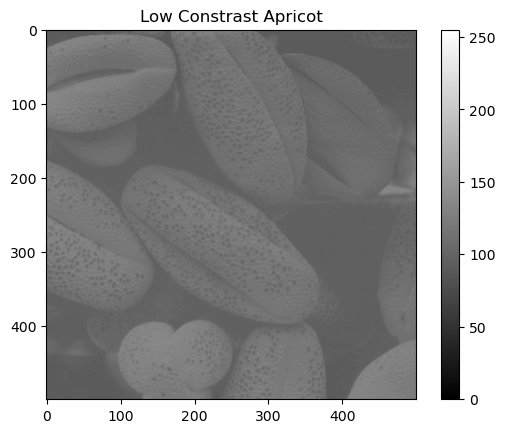

In [108]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('img/lowContrastApricot.pgm')

# Image infos
print('Magic Num:', magicNum)
print('Width:', width)
print('Height:', height)
print('Resolution:', resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix of Low Contrast Apricot Image: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('Low Constrast Apricot')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

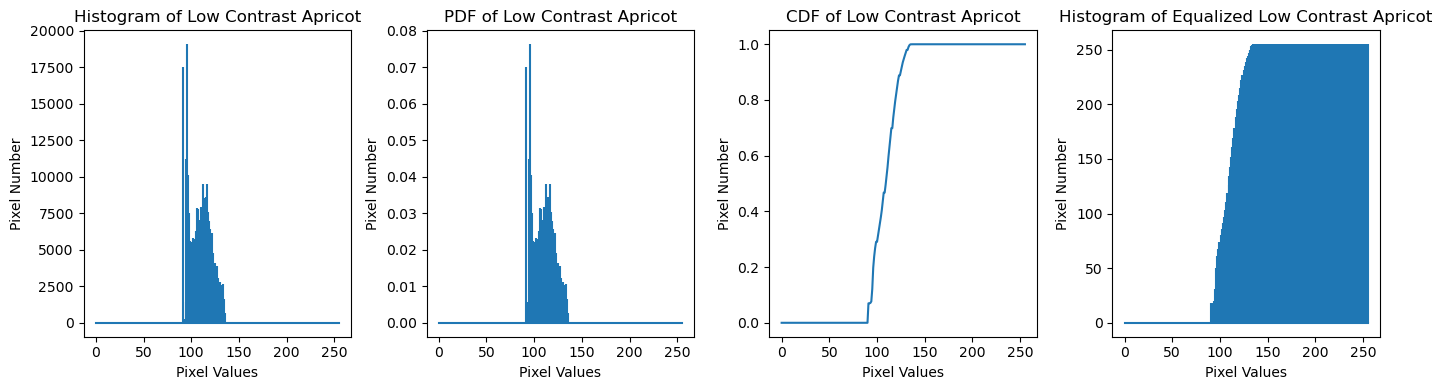

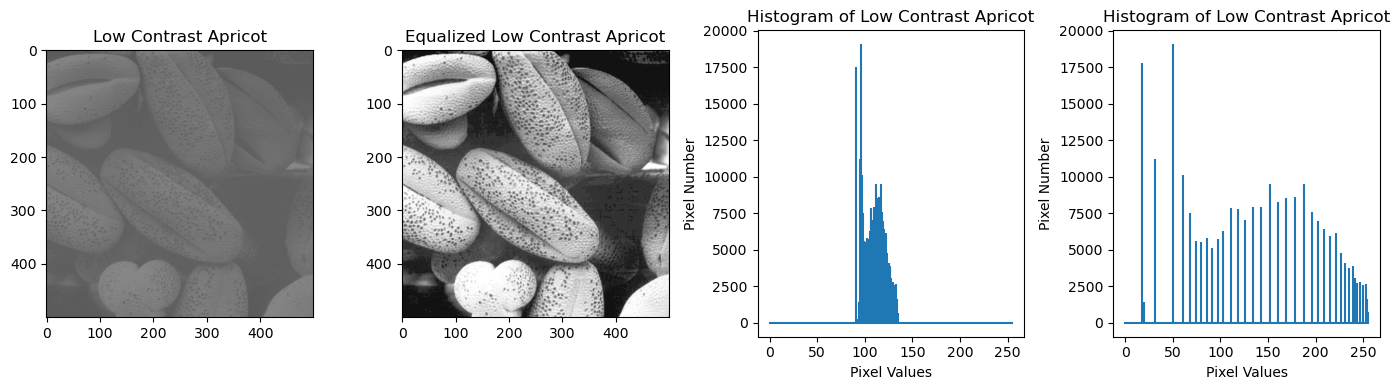

In [109]:
# Calculate histogram of the image
# The np.histogram function returns the histogram and edge values as tuples
# Our interest is only in the histogram vector
# The image.flatten() function converts the matrix from 2D to 1D
# Size of the image matrix is resolution +1
# It used resolution + 2, because of range function does not includes start and end values
histogramVector, _ = np.histogram(image.flatten(), bins=np.arange(resolution + 2))

# Calculate probability density function (PDF)
pdfVector = histogramVector / np.sum(histogramVector)

# Calculate cumulative distribution function (CDF)
cdfVector = np.cumsum(pdfVector)

# Scale the CDF vector
equalizedVector = np.round(cdfVector * 255)

# Create a 2x2 subplot grid
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

# Plot histogram of original image
axs[0].stem(histogramVector, linefmt='-', markerfmt='None', basefmt='')
axs[0].set_title('Histogram of Low Contrast Apricot')
axs[0].set_xlabel('Pixel Values')
axs[0].set_ylabel('Pixel Number')

# Plot PDF of original image
axs[1].stem(pdfVector, linefmt='-', markerfmt='None', basefmt='')
axs[1].set_title('PDF of Low Contrast Apricot')
axs[1].set_xlabel('Pixel Values')
axs[1].set_ylabel('Pixel Number')

# Plot CDF of original image
axs[2].plot(cdfVector)
axs[2].set_title('CDF of Low Contrast Apricot')
axs[2].set_xlabel('Pixel Values')
axs[2].set_ylabel('Pixel Number')

# Plot histogram of equalized image
axs[3].stem(equalizedVector, linefmt='-', markerfmt='None', basefmt='')
axs[3].set_title('Histogram of Equalized Low Contrast Apricot')
axs[3].set_xlabel('Pixel Values')
axs[3].set_ylabel('Pixel Number')

# Adjust spacing between subplots and show the plots
plt.tight_layout()
plt.show()

# Replace the old pixel values with the new ones
equalizedMatrix = equalizedVector[image]

# Calculate histogram of the new image
newHistogramVector, _ = np.histogram(equalizedMatrix.flatten(), bins=np.arange(resolution + 2))

# Create a 2x2 subplot grid
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

# Plot the dark apricot image
axs[0].imshow(image, cmap="gray", vmin=0, vmax=255)
axs[0].set_title('Low Contrast Apricot')

# Plot the equalized dark apricot image
axs[1].imshow(equalizedMatrix, cmap="gray", vmin=0, vmax=255)
axs[1].set_title('Equalized Low Contrast Apricot')

# Plot histogram of original image
axs[2].stem(histogramVector, linefmt='-', markerfmt='None', basefmt='')
axs[2].set_title('Histogram of Low Contrast Apricot')
axs[2].set_xlabel('Pixel Values')
axs[2].set_ylabel('Pixel Number')

# Plot histogram of original image
axs[3].stem(newHistogramVector, linefmt='-', markerfmt='None', basefmt='')
axs[3].set_title('Histogram of Low Contrast Apricot')
axs[3].set_xlabel('Pixel Values')
axs[3].set_ylabel('Pixel Number')

# Adjust spacing between subplots and show the plots
plt.tight_layout()
plt.show()

##### High Contrast Apricot

Magic Num: P5
Width: 500
Height: 500
Resolution: 255

Image Matrix of High Contrast Apricot Image: 

[[  0   0   0 ... 102 102  89]
 [  0   0   0 ...  94  97  81]
 [  0   0   0 ...  71  75  57]
 ...
 [ 24   0   0 ... 201 193 192]
 [ 32  11   0 ... 192 187 176]
 [ 45  23   0 ... 184 183 162]]



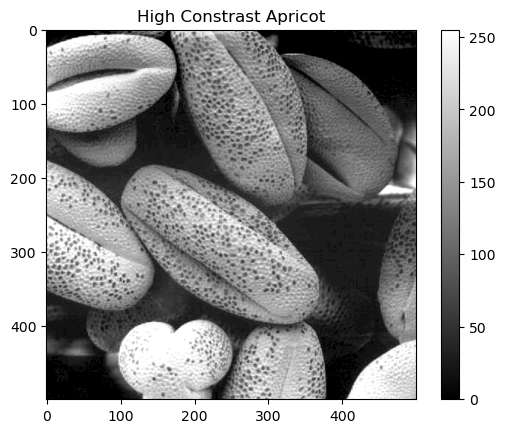

In [110]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('img/highContrastApricot.pgm')

# Image infos
print('Magic Num:', magicNum)
print('Width:', width)
print('Height:', height)
print('Resolution:', resolution)
print()

# Convert image string to byte matrix
image = np.frombuffer(image, dtype=np.uint8).reshape((height, width))

# Image byte matrix info
print('Image Matrix of High Contrast Apricot Image: \n')
print(image)
print()

# Show image
plt.figure()
plt.title('High Constrast Apricot')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

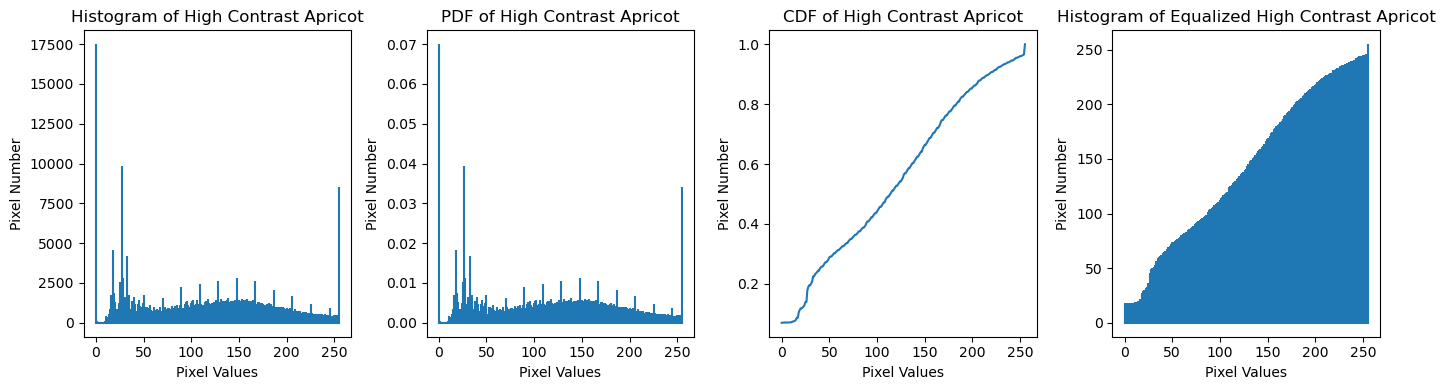

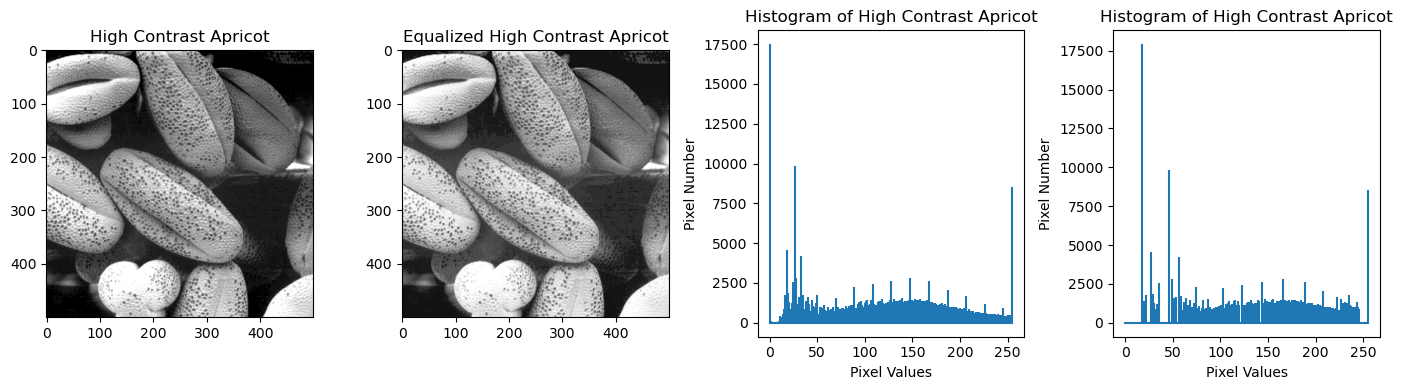

In [111]:
# Calculate histogram of the image
# The np.histogram function returns the histogram and edge values as tuples
# Our interest is only in the histogram vector
# The image.flatten() function converts the matrix from 2D to 1D
# Size of the image matrix is resolution +1
# It used resolution + 2, because of range function does not includes start and end values
histogramVector, _ = np.histogram(image.flatten(), bins=np.arange(resolution + 2))

# Calculate probability density function (PDF)
pdfVector = histogramVector / np.sum(histogramVector)

# Calculate cumulative distribution function (CDF)
cdfVector = np.cumsum(pdfVector)

# Scale the CDF vector
equalizedVector = np.round(cdfVector * 255)

# Create a 2x2 subplot grid
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

# Plot histogram of original image
axs[0].stem(histogramVector, linefmt='-', markerfmt='None', basefmt='')
axs[0].set_title('Histogram of High Contrast Apricot')
axs[0].set_xlabel('Pixel Values')
axs[0].set_ylabel('Pixel Number')

# Plot PDF of original image
axs[1].stem(pdfVector, linefmt='-', markerfmt='None', basefmt='')
axs[1].set_title('PDF of High Contrast Apricot')
axs[1].set_xlabel('Pixel Values')
axs[1].set_ylabel('Pixel Number')

# Plot CDF of original image
axs[2].plot(cdfVector)
axs[2].set_title('CDF of High Contrast Apricot')
axs[2].set_xlabel('Pixel Values')
axs[2].set_ylabel('Pixel Number')

# Plot histogram of equalized image
axs[3].stem(equalizedVector, linefmt='-', markerfmt='None', basefmt='')
axs[3].set_title('Histogram of Equalized High Contrast Apricot')
axs[3].set_xlabel('Pixel Values')
axs[3].set_ylabel('Pixel Number')

# Adjust spacing between subplots and show the plots
plt.tight_layout()
plt.show()

# Replace the old pixel values with the new ones
equalizedMatrix = equalizedVector[image]

# Calculate histogram of the new image
newHistogramVector, _ = np.histogram(equalizedMatrix.flatten(), bins=np.arange(resolution + 2))

# Create a 2x2 subplot grid
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

# Plot the dark apricot image
axs[0].imshow(image, cmap="gray", vmin=0, vmax=255)
axs[0].set_title('High Contrast Apricot')

# Plot the equalized dark apricot image
axs[1].imshow(equalizedMatrix, cmap="gray", vmin=0, vmax=255)
axs[1].set_title('Equalized High Contrast Apricot')

# Plot histogram of original image
axs[2].stem(histogramVector, linefmt='-', markerfmt='None', basefmt='')
axs[2].set_title('Histogram of High Contrast Apricot')
axs[2].set_xlabel('Pixel Values')
axs[2].set_ylabel('Pixel Number')

# Plot histogram of original image
axs[3].stem(newHistogramVector, linefmt='-', markerfmt='None', basefmt='')
axs[3].set_title('Histogram of High Contrast Apricot')
axs[3].set_xlabel('Pixel Values')
axs[3].set_ylabel('Pixel Number')

# Adjust spacing between subplots and show the plots
plt.tight_layout()
plt.show()